In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv("Alcohol_Sales.csv", index_col="DATE", parse_dates=True)

In [3]:
data.columns = ["Sales"]
data.index.freq = 'MS'

Find the "d" parameter:

In [4]:
adfuller(data["Sales"])[1]

0.9987196267088919

In [5]:
adfuller(data["Sales"].diff().dropna())[1]

0.00034082849211699743

Find the "p" parameter

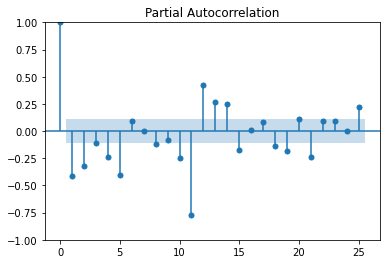

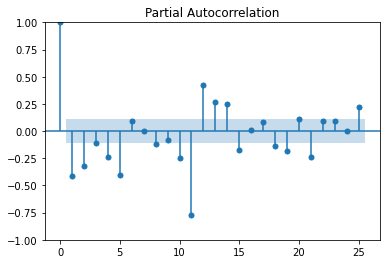

In [10]:
# Do we take ~65 as our "p" parameter?? 
plot_pacf(data["Sales"].diff().dropna(), method='ywm', lags=25)

Find the "q" parameter

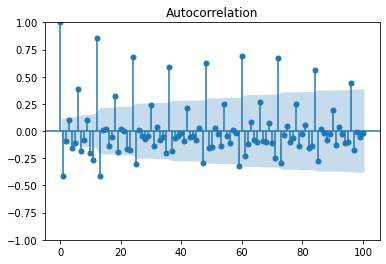

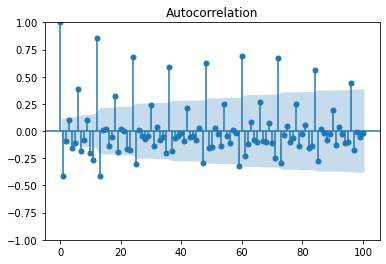

In [36]:
plot_acf(data["Sales"].diff().dropna(), lags=100)

Define the ARIMA model

In [37]:
# Take last year as the test set
N_test = 12
train = data.iloc[:-N_test]
test = data.iloc[-N_test:]

In [38]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\atace\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\atace\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\atace\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='DATE'>

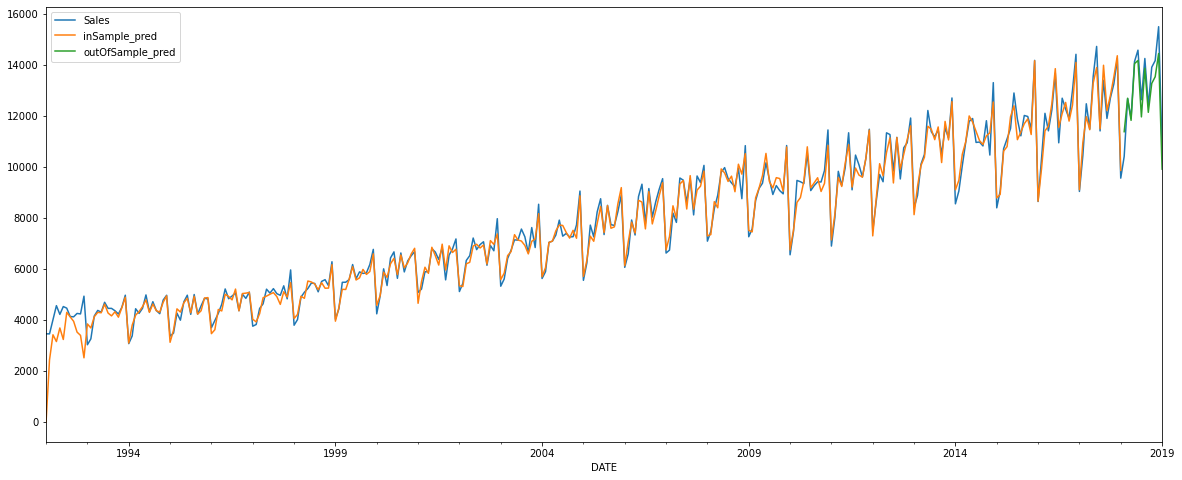

In [71]:
arima = ARIMA(train['Sales'], order=(25,1,12))
arima_fit = arima.fit()
data["inSample_pred"] = arima_fit.predict(start=train.index[0], end=train.index[-1])
data["outOfSample_pred"] = arima_fit.predict(start=test.index[0], end=test.index[-1])
data[["Sales", "inSample_pred", "outOfSample_pred"]].plot(figsize=(20,8))

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(data["Sales"].iloc[-N_test:], data["outOfSample_pred"].iloc[-N_test:], squared=False)

601.2430534434317